In [51]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from skimage.util.shape import view_as_windows
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Read in the averaged vector field data.  

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/U_avg.h5", "r") as file: 
    U = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/V_avg.h5", "r") as file: 
    V = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/M_avg.h5", "r") as file: 
    M = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/xgrid_matrix", "r") as file: 
    xgrid = file["matrix"][:]

with h5py.File("F:/PhD_Franziska/Headon/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/ygrid_matrix", "r") as file: 
    ygrid = file["matrix"][:]

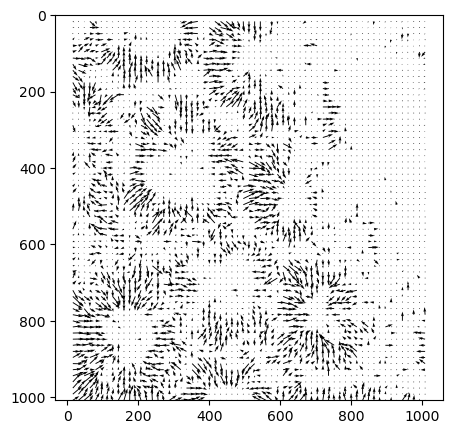

In [95]:
t = 100

plt.figure(figsize=(5, 5))
plt.quiver(xgrid[t], ygrid[t], V[t], -U[t])
plt.ylim(max(ygrid[t][1]), 0)
plt.show()

In [96]:
x_test = xgrid[0][15:42, 30:57]
y_test = ygrid[0][15:42, 30:57]
U_test = U[t][7:34, 12:39]
V_test = V[t][7:34, 12:39]
M_test = M[t][7:34, 12:39]

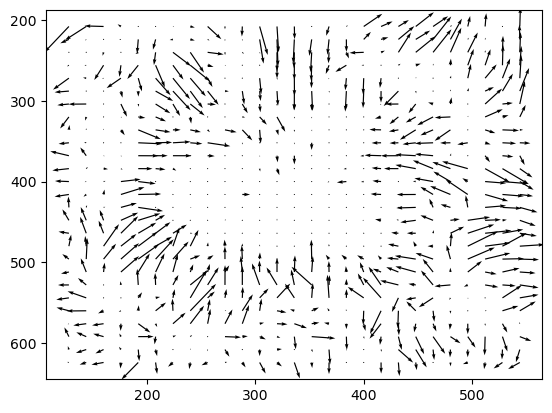

In [97]:
plt.quiver(x_test, y_test, V_test, -U_test)
plt.gca().invert_yaxis()

In [79]:
def get_window_sum(ar, W, i, j):
    # For a given 2D numpy array "ar" extract at the index i,j the subarray with size W = (a, b).
    # Finally return the mean value of the window. 
    # Out of boundary regions are filled by 0.
    h0,h1 = (W[0]-1)//2, (W[1]-1)//2 
    ar_ext = np.pad(ar,((h0,h0),(h1,h1)),'constant',constant_values=(0,0))
    window = view_as_windows(ar_ext, (W[0],W[1]))[i,j]
    return np.sum(window)

In [80]:
get_window_avg(M_test, (3, 3), 14, 14) # radius 1

17.644072

In [113]:
def velocity_cal(sub_M): 
    # The dimensions of sub_U and sub_V must be uneven, So that a center can be defined.
    dim = np.shape(sub_M)
    center = tuple(round(i/2) for i in dim) # (c, c) tuple.
    max_radius = center[0] - 1

    mean_velocity = [sub_M[center[0], center[1]]]
    sum_velocity = [sub_M[center[0], center[1]]]
    
    for r in range(1, max_radius+1): 
        
        window_size = r*2 + 1 
        num_pixel = 8*r  # (2r+1)^2 - (2(r-1)+1)^2 = 8r
        
        # Calculate the sum of velocity within radius r.
        velocity_r = get_window_sum(sub_M, (window_size, window_size), center[0], center[1])
        sum_velocity.append(velocity_r)
        
        # Got the velocity in ring from radius r-1 to r.
        diff_velocity_r = sum_velocity[r] - sum_velocity[r-1]

        # Calculate the mean value in the ring.
        mean_velocity.append(diff_velocity_r/num_pixel)
        
    return mean_velocity

In [117]:
radius_pixel = [i*16 for i in range(len(test_v))]
radius_pixel

[0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208]

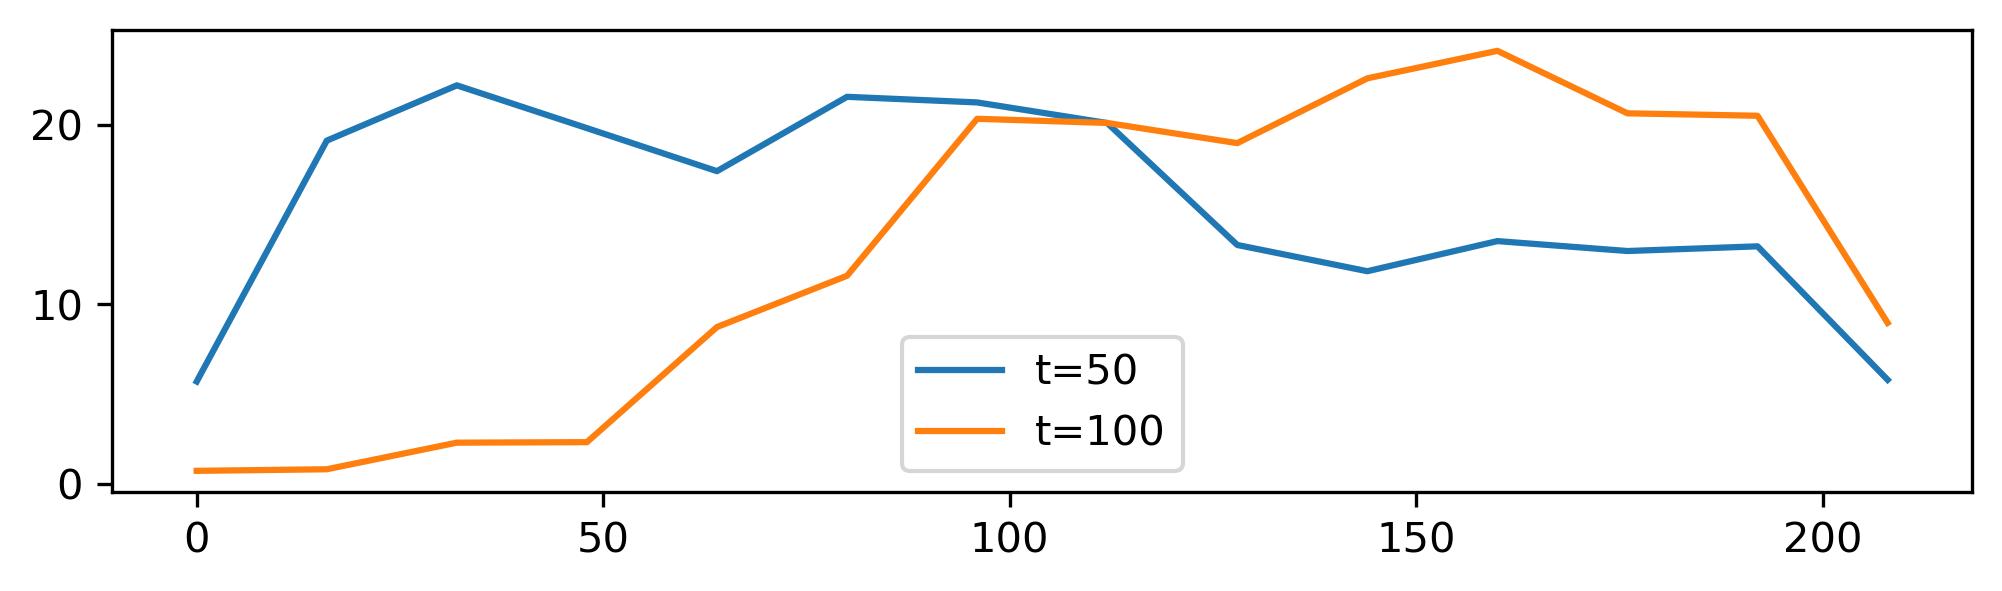

In [120]:
# plot the velocity profile change in time. 
# colors = ["darkorange", "royalblue"]
# n_bins = 20
# cmap_name = 'cmap'
# self_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

plt.figure(figsize=(8, 2), dpi=300)
for t in [50, 100]: 
    mean_v = velocity_cal(M[t][7:34, 12:39])
    radius_pixel = [i*16 for i in range(len(mean_v))]
    plt.plot(radius_pixel, mean_v, label = "t="+str(t))
plt.legend()
plt.savefig("velocity_profile_agg_1")
plt.show()

In [ ]:
# Consider more agregates and align them together (also align to the same start point)



In [26]:
# def orient_calc(sub_U, sub_V): 
#     # The dimensions of sub_U and sub_V must be uneven, So that a center can be defined.
#     dim = np.shape(sub_U)
#     center = tuple(round(i/2) for i in dim)

    

In [ ]:
# def orientation_window(radius, center):
    